In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../dados/microdados_ed_basica_2023.csv', sep=';')

<ipython-input-2-a3af6570c73a>:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('microdados_ed_basica_2023.csv', sep=';')


In [3]:
df_climatizado = df.groupby('NO_REGIAO')['QT_SALAS_UTILIZA_CLIMATIZADAS'].sum().reset_index()
df_total = df.groupby('NO_REGIAO')['QT_SALAS_UTILIZADAS'].sum().reset_index()

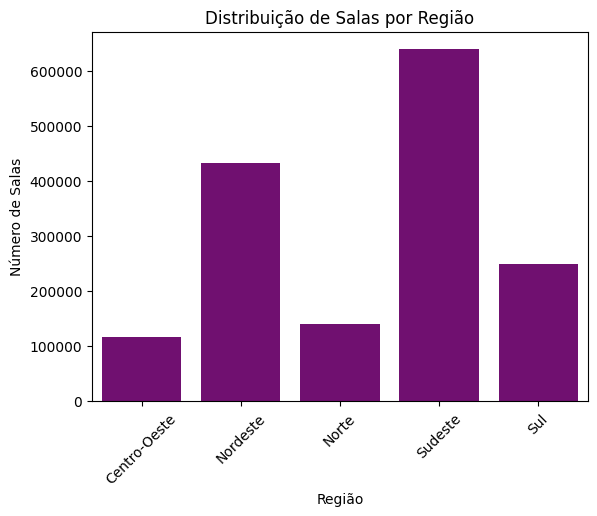

In [4]:
sns.barplot(x='NO_REGIAO', y='QT_SALAS_UTILIZADAS', data=df_total,  color='purple')
plt.title('Distribuição de Salas por Região')
plt.xlabel('Região')
plt.ylabel('Número de Salas')
plt.xticks(rotation=45)
plt.show()

# **Distribuição de salas**:

## Norte
Total de Salas: Aproximadamente 140 mil salas de aula.

Número de Salas: Em média, cada escola têm cerca de 10 a 15 salas de aula.

Desafios: Superlotação é comum, com turmas que podem ter até 40 alunos. Muitas escolas enfrentam problemas de infraestrutura e manutenção.

Infraestrutura: A falta de manutenção e recursos adequados é comum, afetando a qualidade do ensino.

## Nordeste
Total de Salas: Cerca de 450 mil salas de aula.

Número de Salas: As escolas possuem em média entre 8 e 12 salas de aula.

Superlotação: Em algumas áreas, especialmente nas urbanas, as turmas podem ter até 45 alunos, dificultando o aprendizado.

Desigualdade: As escolas rurais frequentemente têm menos salas e recursos, com algumas funcionando em turnos alternados.

## Centro-Oeste

Total de Salas: Aproximadamente 110 mil salas de aula.

Número de Salas: Em média, as escolas têm entre 12 e 18 salas de aula.

Condições: A superlotação é um problema, mas menos acentuado do que nas regiões Norte e Nordeste, com turmas variando de 30 a 35 alunos.

Infraestrutura: A qualidade das instalações é geralmente melhor do que nas regiões mais carentes.



## Sul

Total de Salas: Cerca de 250 mil salas de aula.

Número de Salas: As escolas possuem entre 15 e 20 salas de aula, com algumas escolas maiores tendo ainda mais.

Superlotação: As turmas costumam ter entre 25 e 30 alunos, permitindo um ambiente de aprendizado mais controlado.

Infraestrutura: A qualidade das salas e dos recursos educacionais é superior, refletindo melhores investimentos.

## Sudeste
Total de Salas: Aproximadamente 680 mil salas de aula.

Número de Salas: As escolas têm, em média, entre 15 e 25 salas de aula, com instituições maiores apresentando mais.

Condições de Aprendizado: A superlotação é menos comum, com turmas geralmente variando de 20 a 30 alunos.

Infraestrutura: O Sudeste é a região com melhor infraestrutura escolar, com salas bem equipadas e recursos tecnológicos.


In [5]:
df_porcentagem = pd.merge(df_climatizado, df_total, on='NO_REGIAO')
df_porcentagem['porcentagem_climatizadas'] = (df_porcentagem['QT_SALAS_UTILIZA_CLIMATIZADAS'] / df_porcentagem['QT_SALAS_UTILIZADAS']) * 100

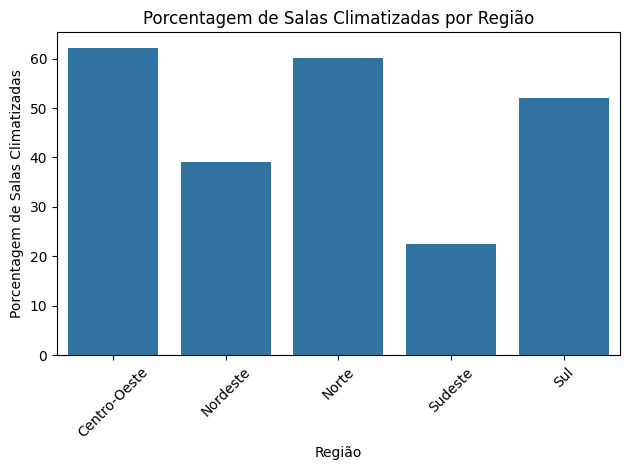

In [6]:
sns.barplot(x='NO_REGIAO', y='porcentagem_climatizadas', data=df_porcentagem)
plt.title('Porcentagem de Salas Climatizadas por Região')
plt.xlabel('Região')
plt.ylabel('Porcentagem de Salas Climatizadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Climatização**

## Norte

Temperatura Média: A média anual varia entre 25°C e 30°C.

Climatização: Apenas cerca de 58% das escolas possuem algum tipo de climatização.

Necessidade: A alta porcentagem pode ser explicada pelas altas temperaturas típicas dessa região, onde a necessidade de climatização é maior para garantir o conforto e a eficiência do ambiente escolar.


## Nordeste

Temperatura Média: As temperaturas frequentemente ultrapassam 30°C, especialmente no interior.

Climatização: Aproximadamente 45% das escolas têm algum tipo de climatização, mas muitas ainda utilizam ventiladores ou janelas abertas.

Condições de Infraestrutura: A maioria das escolas enfrenta dificuldades para manter uma infraestrutura adequada, com baixa proporção de ar-condicionado e condições que não atendem às altas temperaturas da região.

## Centro-Oeste

Temperatura Média: As temperaturas variam entre 25°C e 35°C, com períodos de seca intensa.

Climatização: Mais de 60% das escolas na região são climatizadas.

Infraestrutura: A qualidade das instalações é significativamente melhor do que outras regiões do país.

## Sul

Temperatura Média: A média anual varia entre 15°C e 25°C, com invernos rigorosos.

Climatização: Aproximadamente 50% das escolas têm algum tipo de sistema de climatização.

Análise: Apesar de ser uma região com temperaturas mais amenas em boa parte do ano, o Sul ainda apresenta um percentual expressivo de climatização, cerca de 50%. Isso pode ser reflexo de investimentos em infraestrutura escolar, independentemente das condições climáticas.

## Sudeste

Temperatura Média: As temperaturas variam entre 18°C e 28°C.

Climatização: Cerca de 25% das escolas urbanas estão equipadas com algum tipo de climatização.

Investimentos: O Sudeste aparece como a região com o menor percentual de salas climatizadas, com menos de 30%. Isso pode estar relacionado a um clima mais ameno em partes da região e, talvez, uma menor priorização da climatização em escolas.


In [7]:
df_internet = df[df['IN_INTERNET'] == 1]
total_escolas = df.groupby('NO_REGIAO').size()
total_com_internet = df_internet.groupby('NO_REGIAO').size()
percentual_internet = (total_com_internet / total_escolas) * 100
df_resultado = percentual_internet.reset_index(name='PERCENTUAL_INTERNET')
df_resultado.columns = ['NO_REGIAO', 'PERCENTUAL_INTERNET']

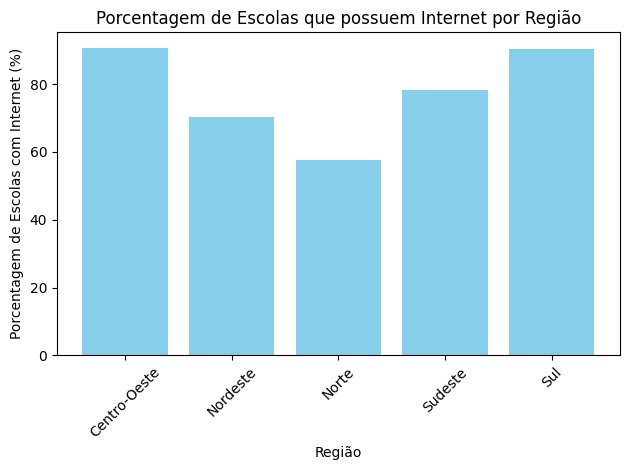

In [8]:
plt.bar(df_resultado['NO_REGIAO'], df_resultado['PERCENTUAL_INTERNET'], color='skyblue')
plt.xlabel('Região')
plt.ylabel('Porcentagem de Escolas com Internet (%)')
plt.title('Porcentagem de Escolas que possuem Internet por Região')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Acesso à Internet**

## Norte

Acesso à Internet: Aproximadamente 50% das escolas possuem acesso à internet.

Desafios: O Norte possui o menor percentual de escolas com acesso à internet, em torno de 50%. Isso reflete desafios históricos de infraestrutura, devido à geografia complexa e à dificuldade de acesso a tecnologias em áreas mais remotas.

## Nordeste

Acesso à Internet: Cerca de 70% das escolas têm acesso à internet, mas a qualidade da conexão é frequentemente baixa.

Diferenças Urbanas/Rurais: Nas áreas urbanas, a taxa de conectividade é maior, em torno de 60%, enquanto nas zonas rurais cai para cerca de 20%.

Programas de Inclusão: Iniciativas como o Programa Banda Larga nas Escolas têm buscado melhorar o acesso, mas os resultados ainda são insuficientes.

## Centro-Oeste

Acesso à Internet: Aproximadamente, mais de 80% das escolas estão conectadas à internet, com uma boa parte delas tendo acesso à banda larga.

Investimentos: Há um aumento recente em investimentos em tecnologia educacional, mas ainda é necessário expandir a infraestrutura.

## Sul
Acesso à Internet: Mais de 80% das escolas têm acesso à internet, sendo uma das regiões com melhor infraestrutura.

Qualidade da Conexão: A maioria das escolas urbanas possui acesso à banda larga, com uma taxa de conectividade rural em torno de 50%.

Iniciativas Tecnológicas: Programas de inclusão digital têm sido implementados, melhorando o cenário nas escolas. Isso reflete maior investimento em infraestrutura tecnológica e uma maior atenção às necessidades de digitalização das escolas nessas regiões.

## Sudeste

Acesso à Internet: Aproximadamente 80% das escolas urbanas têm acesso à internet, com a maioria utilizando banda larga.

Investimentos: O Sudeste, apesar de ser uma região mais desenvolvida economicamente, ainda não alcança os níveis do Sul ou Centro-Oeste, o que sugere desigualdades intra-regionais.


In [9]:
df_com_agua_potavel = df[df['IN_AGUA_POTAVEL'] == 1]
total_com_agua_potavel = df_com_agua_potavel.groupby('NO_REGIAO').size()
percentual_com_agua_potavel = (total_com_agua_potavel / total_escolas) * 100
df_resultado_com_agua_potavel = percentual_com_agua_potavel.reset_index(name='PERCENTUAL_COM_AGUA_POTAVEL')
df_resultado_com_agua_potavel.columns = ['NO_REGIAO', 'PERCENTUAL_COM_AGUA_POTAVEL']

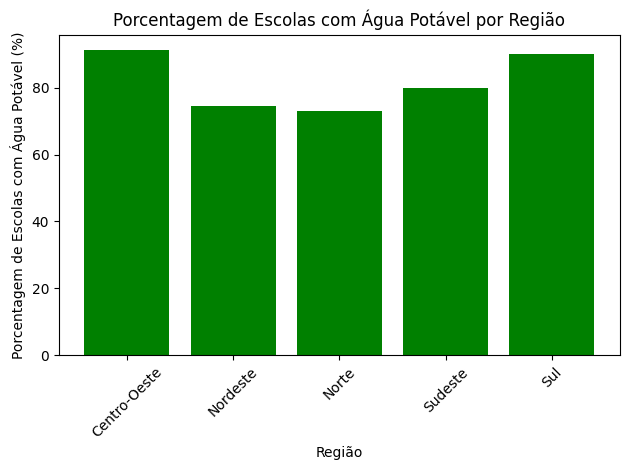

In [10]:
plt.bar(df_resultado_com_agua_potavel['NO_REGIAO'], df_resultado_com_agua_potavel['PERCENTUAL_COM_AGUA_POTAVEL'], color='green')
plt.xlabel('Região')
plt.ylabel('Porcentagem de Escolas com Água Potável (%)')
plt.title('Porcentagem de Escolas com Água Potável por Região')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Aguá Potável**

## Norte

Total de Escolas com Água Potável: Aproximadamente 70% das escolas têm acesso a água potável.

Desafios: A região têm percentuais menores em comparação às outras, indicando desafios relacionados ao acesso a água de qualidade, principalmente em áreas remotas.

Comparação: A situação é crítica em algumas comunidades isoladas, onde o acesso à água tratada é limitado.

## Nordeste

Total de Escolas com Água Potável: Cerca de 75% das escolas possuem acesso à água potável.

Desigualdade: Embora a porcentagem seja relativamente alta, muitas escolas ainda dependem de fontes alternativas, como cisternas, que podem não garantir a qualidade necessária.

Impacto: A falta de água potável afeta diretamente a saúde dos alunos e a frequência escolar.

## Centro-Oeste

Total de Escolas com Água Potável: Mais de 80% das escolas têm acesso a água potável.

Infraestrutura: A região apresenta melhor infraestrutura em comparação com as outras regiões do país.

Comparação: Tem o maior percentual de escolas com acesso a água potável, demonstrando um padrão elevado de infraestrutura básica em instituições de ensino.

## Sul

Total de Escolas com Água Potável: Mais de 80% das escolas têm acesso a água potável.

Condições: A infraestrutura é bem desenvolvida, e a maioria das escolas tem sistemas de abastecimento eficientes.

Impacto Positivo: A alta disponibilidade de água potável contribui para um ambiente escolar mais saudável.


## Sudeste

Total de Escolas com Água Potável: Aproximadamente 80% das escolas possuem acesso à água potável.

Comparação: O Sudeste apresenta um percentual próximo ao das regiões com maior destaque (Centro-Oeste e Sul), o que demonstra uma boa cobertura em termos de acesso à água potável. Apesar disso, sua performance ainda não se iguala completamente às melhores.

In [11]:
tipo_dependencia = {1: "Federal", 2: "Estadual", 3: "Municipal", 4: "Privada"}
df['TP_DEPENDENCIA'] = df['TP_DEPENDENCIA'].map(tipo_dependencia)

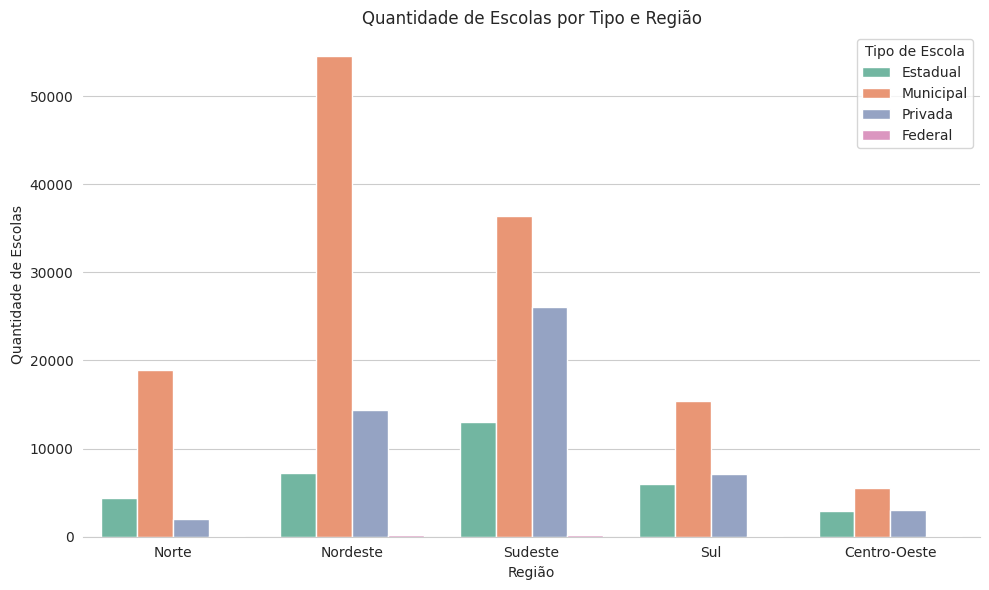

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
g = sns.countplot(
    x="NO_REGIAO",
    hue="TP_DEPENDENCIA",
    data=df,
    palette="Set2"
)

plt.xlabel("Região")
plt.ylabel("Quantidade de Escolas")
plt.title("Quantidade de Escolas por Tipo e Região")
plt.legend(title="Tipo de Escola")
sns.despine(left=True)

plt.tight_layout()
plt.show()

# **Tipos de escola**

## Escolas Municipais:
São predominantes em todas as regiões, com destaque no Nordeste, onde o número ultrapassa 50.000.

O Sudeste também apresenta um número elevado.

## Escolas Estaduais:
Têm um número expressivo no Sudeste e Nordeste, indicando que essas regiões concentram muitas escolas desse tipo.

O Sul também possui um número significativo.

## Escolas Privadas:
Apresentam números consistentes em todas as regiões, com maior concentração no Sudeste, sugerindo maior capacidade econômica e maior demanda por educação privada.

## Escolas Federais:
Têm menor presença em todas as regiões, com uma quantidade um pouco maior no Nordeste e Sudeste.

## Disparidades regionais:
O Nordeste apresenta o maior número de escolas, especialmente municipais, enquanto o Centro-Oeste tem os menores valores em quase todos os tipos de escolas.


In [13]:
df_biblioteca = df[df['IN_BIBLIOTECA'] == 1]
total_escolas = df.groupby('NO_REGIAO').size()
total_com_biblioteca = df_biblioteca.groupby('NO_REGIAO').size()
percentual_biblioteca = (total_com_biblioteca / total_escolas) * 100
df_resultado_bli = percentual_biblioteca.reset_index(name='PERCENTUAL_BIBLIOTECA')
df_resultado_bli.columns = ['NO_REGIAO', 'PERCENTUAL_BIBLIOTECA']

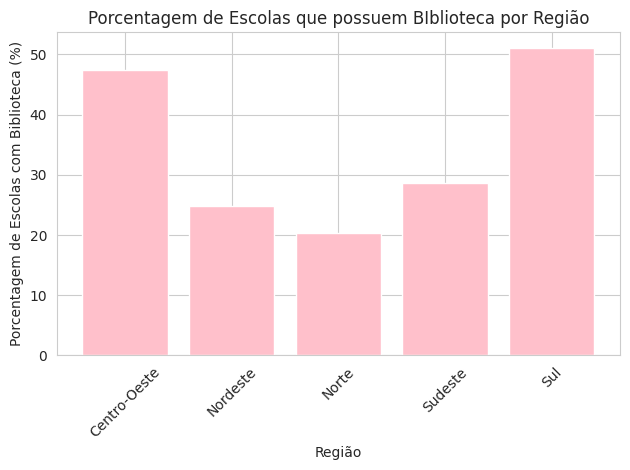

In [14]:
plt.bar(df_resultado_bli['NO_REGIAO'], df_resultado_bli['PERCENTUAL_BIBLIOTECA'], color='pink')
plt.xlabel('Região')
plt.ylabel('Porcentagem de Escolas com Biblioteca (%)')
plt.title('Porcentagem de Escolas que possuem BIblioteca por Região')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Porcentagem de Escolas com Biblioteca por Região**

## Norte
Porcentagem de Escolas com Biblioteca: Aproximadamente 20%.

Situação: A região apresenta a menor porcentagem de escolas com bibliotecas, refletindo grandes desafios de infraestrutura educacional.

Desafios: A escassez de bibliotecas é agravada pela dificuldade de acesso e falta de investimento em áreas remotas, comprometendo o acesso dos alunos a materiais didáticos.

## Nordeste
Porcentagem de Escolas com Biblioteca: Cerca de 30%.

Situação: Embora superior à região Norte, o percentual ainda é baixo, considerando a ampla quantidade de escolas na região.

Desafios: Escolas rurais enfrentam maiores dificuldades para manter bibliotecas, enquanto áreas urbanas têm maior acesso, mas ainda insuficiente para atender toda a demanda.

## Centro-Oeste
Porcentagem de Escolas com Biblioteca: Aproximadamente 50%.

Situação: A região apresenta um desempenho positivo, com metade das escolas possuindo bibliotecas.

Pontos Fortes: A presença de políticas públicas voltadas à educação e melhores condições estruturais nas escolas contribuem para esse índice elevado.

## Sul
Porcentagem de Escolas com Biblioteca: Cerca de 50%.

Situação: Assim como o Centro-Oeste, a região se destaca positivamente em relação à presença de bibliotecas nas escolas.

Pontos Fortes: O investimento contínuo em infraestrutura e educação de qualidade favorece o acesso dos alunos a espaços dedicados ao aprendizado e leitura.

## Sudeste
Porcentagem de Escolas com Biblioteca: Cerca de 35%.

Situação: Apesar de possuir a melhor infraestrutura educacional em outros aspectos, o índice de escolas com bibliotecas não se destaca.

Desafios: A disparidade interna é significativa, com áreas metropolitanas bem equipadas e periferias ou cidades menores enfrentando carências nesse aspecto.

## Análise Geral
O gráfico evidencia grandes disparidades regionais no acesso a bibliotecas escolares. Enquanto Sul e Centro-Oeste lideram com cerca de 50% das escolas atendidas, Norte e Nordeste enfrentam maiores dificuldades estruturais. Essas desigualdades reforçam a necessidade de políticas públicas voltadas à ampliação do acesso a bibliotecas escolares, com foco em regiões historicamente menos favorecidas, promovendo a equidade e o fortalecimento da educação básica.
